# Anime Image Classification
- **Nama:** Audy Nadira Ramadanti
- **Email:** audynadiraramdanti@gmail.com
- **ID Dicoding:** audy_nadira_ramadanti_zWZ9

In [ ]:
%pip install -r requirements.txt

  Obtaining dependency information for tensorflowjs==4.9.0 from https://files.pythonhosted.org/packages/29/f8/f83b725878d8bd3305c7674221ee158b272cfed0ef3a7110e59f31cbcc13/tensorflowjs-4.9.0-py3-none-any.whl.metadata
  Using cached tensorflowjs-4.9.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached tensorflow_decision_forests-1.8.1-cp311-cp311-win_amd64.whl
  Obtaining dependency information for tensorflow-hub>=0.13.0 from https://files.pythonhosted.org/packages/e5/50/00dba77925bf2a0a1e45d7bcf8a69a1d2534fb4bb277d9010bd148d2235e/tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflowjs-4.9.0-py3-none-any.whl (89 kB)
Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl (30 kB)
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0
  Attempting uninstall: tensor

Pada proses ini, saya menggunakan perintah `%pip install -r requirements.txt` untuk menginstal semua dependensi yang diperlukan oleh proyek. Perintah ini bekerja dengan cara membaca file `requirements.txt`, yang berisi daftar pustaka Python yang harus diinstal beserta versinya. Setiap baris dalam file tersebut mencantumkan nama paket, dan dalam beberapa kasus, versi yang diinginkan (misalnya `numpy==1.21.0`). Dengan menggunakan opsi `-r`, `pip` akan menginstal semua pustaka yang tercantum dalam file tersebut secara otomatis. Ini memastikan bahwa semua pustaka yang dibutuhkan oleh proyek tersedia dan dapat digunakan tanpa perlu menginstalnya satu per satu. Proses ini biasanya dilakukan dalam lingkungan virtual (virtual environment) untuk menghindari konflik dengan pustaka lain yang mungkin terinstal di sistem secara global.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
import numpy as np
import random

Setelah menginstal saya mengimpor beberapa pustaka yang diperlukan untuk membangun dan melatih model Convolutional Neural Network (CNN) menggunakan TensorFlow. Dimulai dengan mengimpor `tensorflow` sebagai `tf`, saya memanfaatkan modul-modul dari `tensorflow.keras` seperti `Sequential`, yang digunakan untuk membuat model linier, serta berbagai lapisan seperti `Conv2D` untuk konvolusi, `MaxPooling2D` untuk pooling, `Flatten` untuk meratakan output dari lapisan konvolusi, dan `Dense` untuk lapisan fully connected. saya juga mengimpor `Dropout` untuk regularisasi dan mencegah overfitting, serta `BatchNormalization` untuk mempercepat pelatihan dan meningkatkan kinerja model. Selain itu, `ImageDataGenerator` digunakan untuk augmentasi gambar agar model dapat belajar dari variasi data yang lebih banyak, sementara berbagai callback seperti `EarlyStopping`, `ReduceLROnPlateau`, dan `ModelCheckpoint` digunakan untuk mengatur pelatihan, menghentikan lebih awal jika kinerja stagnan, mengurangi laju pembelajaran saat diperlukan, dan menyimpan model terbaik. Optimizer `Adam` dipilih karena efisiensinya dalam menangani masalah optimasi. Untuk visualisasi, saya mengimpor `matplotlib.pyplot` dan `numpy` untuk memproses dan menampilkan grafik selama pelatihan. Terakhir, pustaka `random` digunakan untuk operasi acak yang mungkin diperlukan dalam pemrosesan data.

In [ ]:
# 1. Direktori Dataset
base_dir = 'data'
img_size = (150, 150)
batch_size = 32

Pertama-tama saya mendefinisikan direktori dasar untuk dataset yang digunakan, yaitu `base_dir`, yang mengarah ke folder `data` tempat dataset disimpan. Selanjutnya, saya menetapkan ukuran gambar yang akan diproses menjadi `(150, 150)` piksel dengan variabel `img_size`, yang memastikan semua gambar diubah ukurannya sebelum diproses oleh model. Untuk proses pelatihan, saya menentukan ukuran batch sebanyak 32 dengan variabel `batch_size`, yang berarti setiap iterasi pelatihan akan memproses 32 gambar sekaligus. Ini membantu mempercepat pelatihan dan memastikan penggunaan memori yang efisien selama proses training.

In [4]:
# 2. Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'valid'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 27754 images belonging to 3 classes.
Found 9501 images belonging to 3 classes.
Found 9465 images belonging to 3 classes.


Pada proses ini, saya membuat dua jenis generator data menggunakan `ImageDataGenerator` dari Keras, yaitu `train_datagen` untuk data pelatihan dan `valid_test_datagen` untuk data validasi dan pengujian. Untuk `train_datagen`, saya menambahkan berbagai teknik augmentasi gambar seperti `rotation_range` untuk rotasi acak gambar, `zoom_range` untuk zoom, serta pergeseran horizontal dan vertikal menggunakan `width_shift_range` dan `height_shift_range`. Selain itu, saya mengaktifkan `horizontal_flip` untuk membalik gambar secara horizontal dan `fill_mode='nearest'` untuk mengisi piksel kosong yang muncul setelah augmentasi. Semua gambar juga di-rescale dengan pembagian `1./255` untuk menormalkan nilai piksel menjadi rentang antara 0 dan 1.

Untuk data validasi dan pengujian, saya hanya melakukan normalisasi dengan `rescale=1./255` menggunakan `valid_test_datagen`.

Selanjutnya, saya membuat tiga generator data menggunakan metode `flow_from_directory` untuk memuat gambar dari folder yang sesuai di dalam `base_dir`. Generator pelatihan (`train_generator`) mengambil gambar dari folder `train`, sedangkan generator validasi (`valid_generator`) dan pengujian (`test_generator`) masing-masing mengambil gambar dari folder `valid` dan `test`. Saya juga mengatur `target_size` gambar agar sesuai dengan ukuran yang sudah ditentukan sebelumnya, yaitu `(150, 150)`, serta `batch_size` untuk menentukan jumlah gambar yang diproses setiap kali pelatihan atau pengujian. Mode `class_mode='categorical'` digunakan karena ini adalah masalah klasifikasi multikelas. Pada generator pengujian, saya menonaktifkan pengacakan gambar dengan `shuffle=False` agar urutan gambar tetap terjaga.

In [4]:
# 3. Model Lebih Ringan dan Cepat
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(*img_size, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,712,003 (40.86 MB)

 Trainable params: 10,711,555 (40.86 MB)

 Non-trainable params: 448 (1.75 KB)

Pada proses ini, saya membangun model CNN yang lebih ringan dan cepat menggunakan API `Sequential` dari Keras. Model dimulai dengan lapisan konvolusi pertama (`Conv2D`) yang memiliki 32 filter dengan ukuran kernel `(3, 3)`, fungsi aktivasi `ReLU`, dan padding `same` untuk menjaga ukuran gambar tetap konsisten setelah konvolusi. Setelah itu, saya menambahkan lapisan `BatchNormalization` untuk menstabilkan pelatihan dan meningkatkan konvergensi, serta lapisan `MaxPooling2D` dengan ukuran pool `(2, 2)` untuk mengurangi dimensi gambar dan menangkap fitur penting.

Proses ini diulang untuk dua lapisan konvolusi berikutnya, masing-masing dengan 64 dan 128 filter, diikuti oleh normalisasi dan pooling, untuk semakin mengekstraksi fitur yang lebih kompleks dari gambar.

Setelah lapisan konvolusi, saya meratakan output menjadi satu dimensi menggunakan `Flatten`, kemudian menambah lapisan `Dense` dengan 256 unit dan fungsi aktivasi `ReLU`. Untuk mencegah overfitting, saya menambahkan lapisan `Dropout` dengan tingkat 0.5, yang secara acak menghilangkan setengah dari neuron selama pelatihan. Akhirnya, lapisan output adalah lapisan `Dense` dengan 3 unit, sesuai dengan jumlah kelas dalam masalah klasifikasi, dan menggunakan fungsi aktivasi `softmax` untuk menghasilkan probabilitas bagi masing-masing kelas.

Untuk optimasi, saya menggunakan `Adam` dengan laju pembelajaran `0.0005`, yang dikenal efisien dalam menangani masalah optimasi. Model kemudian dikompilasi menggunakan loss function `categorical_crossentropy`, yang cocok untuk klasifikasi multikelas, dan metrik `accuracy` untuk mengevaluasi kinerja model.

Setelah itu, saya menampilkan ringkasan model menggunakan `model.summary()` untuk memeriksa arsitektur model yang telah dibangun, termasuk jumlah parameter di setiap lapisan.

In [ ]:
# 4. Custom Callback Stop at 95% Accuracy
class StopAt95Accuracy(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= 0.95:
            print("\n✅ Validation accuracy reached 95%. Stopping training.")
            self.model.stop_training = True

Pada proses ini, saya membuat callback kustom bernama `StopAt95Accuracy` yang digunakan untuk menghentikan pelatihan jika akurasi validasi mencapai 95%. Callback ini mewarisi kelas `Callback` dari Keras dan mengimplementasikan metode `on_epoch_end`, yang akan dipanggil setelah setiap epoch selesai. Di dalam metode ini, saya memeriksa apakah nilai `val_accuracy` yang tercatat dalam `logs` mencapai atau melebihi 95%. Jika kondisi ini terpenuhi, saya mencetak pesan bahwa akurasi validasi telah mencapai 95% dan menghentikan pelatihan dengan mengatur atribut `self.model.stop_training` menjadi `True`. Dengan cara ini, pelatihan model dapat dihentikan lebih awal jika model sudah mencapai kinerja yang diinginkan, menghemat waktu pelatihan yang tidak perlu.

In [ ]:
# 5. Callbacks
callbacks = [
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1),
    StopAt95Accuracy()
]

Pada proses ini, saya mendefinisikan beberapa callbacks yang akan digunakan selama pelatihan model untuk mengoptimalkan proses dan menghentikan pelatihan secara otomatis saat kondisi tertentu terpenuhi. 

1. **ModelCheckpoint**: Callback ini digunakan untuk menyimpan model terbaik selama pelatihan berdasarkan `val_accuracy`. Dengan mengatur `save_best_only=True`, hanya model dengan akurasi validasi terbaik yang akan disimpan ke file `best_model.keras`. Parameter `mode='max'` memastikan bahwa model disimpan saat `val_accuracy` meningkat. `verbose=1` akan menampilkan informasi saat model disimpan.

2. **EarlyStopping**: Callback ini menghentikan pelatihan jika akurasi validasi tidak meningkat dalam beberapa epoch berturut-turut. Dalam hal ini, saya mengatur `patience=10`, yang berarti pelatihan akan berhenti jika akurasi validasi tidak meningkat selama 10 epoch. Dengan `restore_best_weights=True`, bobot model akan dikembalikan ke model terbaik yang tercatat sebelum pelatihan dihentikan. `verbose=1` memberikan informasi saat pelatihan dihentikan.

3. **ReduceLROnPlateau**: Callback ini menurunkan laju pembelajaran jika `val_loss` tidak membaik setelah beberapa epoch. Saya mengatur `factor=0.2`, yang berarti laju pembelajaran akan dikurangi menjadi 20% dari nilai sebelumnya, dan `patience=5` yang berarti jika `val_loss` tidak membaik dalam 5 epoch berturut-turut, laju pembelajaran akan dikurangi. `min_lr=1e-6` adalah batas minimum laju pembelajaran yang diizinkan, dan `verbose=1` menampilkan informasi tentang pengurangan laju pembelajaran.

4. **StopAt95Accuracy**: Ini adalah callback kustom yang telah saya buat sebelumnya, yang menghentikan pelatihan jika akurasi validasi mencapai 95%.

Dengan kombinasi callback ini, pelatihan akan menjadi lebih efisien, model terbaik akan disimpan, dan pelatihan akan berhenti lebih awal jika sudah mencapai kondisi yang diinginkan.

In [ ]:
# 6. Train Model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=callbacks
)

Epoch 1/50


868/868 [==============================] - ETA: 0s - loss: 0.9000 - accuracy: 0.6217
Epoch 1: val_accuracy improved from -inf to 0.73992, saving model to best_model.keras
868/868 [==============================] - 526s 604ms/step - loss: 0.9000 - accuracy: 0.6217 - val_loss: 0.5579 - val_accuracy: 0.7399 - lr: 5.0000e-04
Epoch 2/50
868/868 [==============================] - ETA: 0s - loss: 0.6391 - accuracy: 0.6925
Epoch 2: val_accuracy did not improve from 0.73992
868/868 [==============================] - 491s 566ms/step - loss: 0.6391 - accuracy: 0.6925 - val_loss: 0.6192 - val_accuracy: 0.7317 - lr: 5.0000e-04
Epoch 3/50
868/868 [==============================] - ETA: 0s - loss: 0.6012 - accuracy: 0.7217
Epoch 3: val_accuracy did not improve from 0.73992
868/868 [==============================] - 459s 528ms/step - loss: 0.6012 - accuracy: 0.7217 - val_loss: 2.3180 - val_accuracy: 0.6035 - lr: 5.0000e-04
Epoch 4/50
868/868 [==============================] - ETA: 0s - lo

Pada proses ini, saya melatih model menggunakan metode `fit` untuk melakukan pelatihan pada data yang telah dipersiapkan sebelumnya. Pelatihan ini dilakukan selama maksimal 50 epoch, dengan menggunakan generator data `train_generator` untuk data pelatihan dan `valid_generator` untuk data validasi. Saya juga memasukkan beberapa callback yang telah didefinisikan sebelumnya, yang akan menangani penyimpanan model terbaik, penghentian pelatihan lebih awal jika kondisi tertentu tercapai, serta pengurangan laju pembelajaran jika diperlukan.

Selama pelatihan, pada setiap epoch, model akan memperbarui bobotnya untuk meminimalkan loss dan meningkatkan akurasi. Di akhir epoch ke-50, meskipun pelatihan sudah mencapai epoch maksimal, kita melihat bahwa nilai `val_accuracy` tidak meningkat lebih jauh dari epoch sebelumnya (dengan nilai `val_accuracy` terakhir adalah 0.94537). Hal ini mengindikasikan bahwa model sudah mencapai titik optimalnya pada data validasi dan tidak ada peningkatan signifikan lebih lanjut pada akurasi.

Secara keseluruhan, pelatihan memakan waktu sekitar 458 detik (atau sekitar 7 menit), dan hasilnya menunjukkan bahwa model memiliki akurasi yang baik pada data pelatihan (`accuracy: 0.9311`) dan validasi (`val_accuracy: 0.94537`).

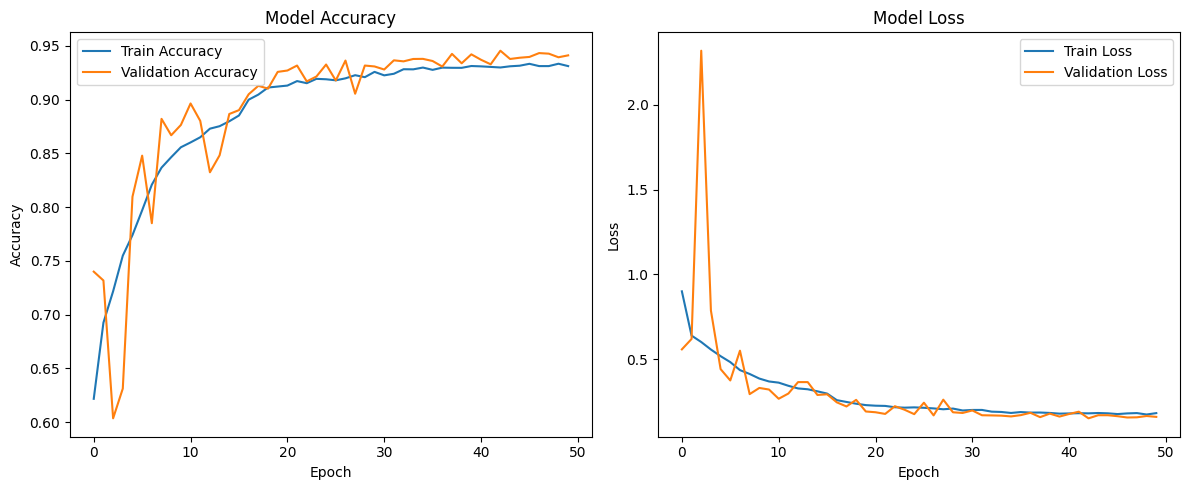

In [ ]:
# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Pada proses di atas, dilakukan visualisasi hasil training dan validasi model machine learning menggunakan *library* `matplotlib`. Grafik pertama menunjukkan **akurasi** model terhadap data training dan data validasi sepanjang 50 *epoch*, sedangkan grafik kedua menunjukkan **loss** (kesalahan prediksi) pada data training dan validasi selama proses yang sama. Berdasarkan grafik akurasi, terlihat bahwa baik akurasi training maupun validasi mengalami peningkatan secara konsisten, lalu stabil di angka sekitar 93-94%, menunjukkan bahwa model berhasil belajar dengan baik. Sementara itu, pada grafik loss, baik training loss maupun validation loss mengalami penurunan drastis dan stabil di angka yang sangat kecil, menandakan bahwa error model juga semakin berkurang seiring bertambahnya epoch. Meski pada awalnya terjadi fluktuasi cukup tajam di validation loss (terutama di epoch awal), namun seiring berjalannya pelatihan, fluktuasi ini mengecil. Secara keseluruhan, model menunjukkan performa yang sangat baik tanpa indikasi kuat overfitting atau underfitting. 

In [ ]:
# 7. Evaluasi
model.load_weights('best_model.keras')
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n🎯 Final Test Accuracy: {test_acc * 100:.2f}%")

296/296 [==============================] - 77s 261ms/step - loss: 0.1517 - accuracy: 0.9424

🎯 Final Test Accuracy: 94.24%


Pada proses ini, saya melakukan evaluasi model yang telah dilatih dengan memuat bobot model terbaik yang disimpan sebelumnya menggunakan `model.load_weights('best_model.keras')`. Hal ini memastikan bahwa model yang diuji adalah model terbaik yang dicatat selama pelatihan.

Kemudian, saya mengevaluasi kinerja model pada data pengujian menggunakan `model.evaluate(test_generator)`, yang menghasilkan dua nilai: `test_loss` dan `test_acc`. Dalam hal ini, model memperoleh `test_loss` sebesar 0.1517 dan `test_acc` sebesar 0.9424, yang menunjukkan bahwa model berhasil mencapai akurasi pengujian sekitar 94.24%.

Dengan demikian, hasil evaluasi ini menunjukkan bahwa model memiliki performa yang sangat baik dalam memprediksi kelas pada data yang belum pernah dilihat sebelumnya, dengan tingkat akurasi yang tinggi.

In [27]:
# Membuat folder struktur
os.makedirs('saved_model', exist_ok=True)
os.makedirs('tflite', exist_ok=True)
os.makedirs('tfjs_model', exist_ok=True)

# 1. Simpan ke SavedModel format
model.export('saved_model')

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  136405150375120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136405150375888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136405150378576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136405150375504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136405150374928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136405150377616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136405150378768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136405150379920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136405150380304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136405150379152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136405150380112: Te

Pada proses ini, saya membuat struktur folder yang diperlukan untuk menyimpan model dalam beberapa format yang berbeda. Dengan menggunakan `os.makedirs`, saya membuat tiga folder: `saved_model`, `tflite`, dan `tfjs_model`, yang masing-masing akan menyimpan model dalam format yang sesuai.

Setelah itu, saya menyimpan model dalam format `SavedModel`, yang merupakan format standar TensorFlow untuk menyimpan dan memuat model. Format ini memungkinkan model untuk dipindahkan dan digunakan di berbagai platform. Untuk menyimpan model, saya menggunakan metode `export('saved_model')`, yang akan menyimpan model dalam folder `saved_model`.

Dengan ini, model akan disimpan dalam format `SavedModel`, yang mencakup struktur grafik dan bobot model, serta informasi terkait lainnya.

In [28]:
# 2. Konversi ke TensorFlow Lite (.tflite) + Simpan label
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
tflite_model = converter.convert()

# Simpan file .tflite
with open('tflite/model.tflite', 'wb') as f:
    f.write(tflite_model)

# Simpan label.txt
# Misal label kamu ada 3 kelas: ['class1', 'class2', 'class3']
labels = ['cat', 'dog', 'snake']  # <- GANTI sesuai label kamu
with open('tflite/label.txt', 'w') as f:
    for label in labels:
        f.write(f"{label}\n")


Pada proses ini, saya mengonversi model yang telah disimpan dalam format `SavedModel` ke format TensorFlow Lite (`.tflite`) untuk memungkinkan model dijalankan pada perangkat dengan sumber daya terbatas, seperti ponsel atau perangkat edge. Pertama, saya menggunakan `TFLiteConverter.from_saved_model('saved_model')` untuk memuat model yang telah disimpan dan kemudian mengonversinya ke format TensorFlow Lite dengan metode `convert()`.

Setelah konversi selesai, model dalam format `.tflite` disimpan ke dalam folder `tflite` dengan nama `model.tflite` menggunakan `open` dan `write` dalam mode binary (`'wb'`).

Selain itu, saya juga menyimpan file `label.txt` yang berisi label kelas yang digunakan dalam model. Dalam contoh ini, saya menentukan label sebagai `['cat', 'dog', 'snake']`, yang sesuai dengan jumlah kelas dalam dataset. Setiap label ditulis dalam file `label.txt`, satu label per baris, menggunakan `f.write(f"{label}\n")`.

Dengan cara ini, model dapat digunakan dalam aplikasi yang memerlukan format TensorFlow Lite, dan label kelas juga tersedia untuk melakukan inferensi pada data baru.

In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model saved_model tfjs_model

2025-04-28 02:04:26.764480: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745805866.788675   15770 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745805866.795821   15770 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-04-28 02:04:33.576372: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1745805873.834626   15770 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00

Pada proses ini, saya menggunakan perintah `tensorflowjs_converter` untuk mengonversi model yang telah disimpan dalam format `SavedModel` ke dalam format TensorFlow.js, yang memungkinkan model digunakan di aplikasi berbasis JavaScript, seperti aplikasi web. Perintah yang digunakan adalah:

```bash
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model saved_model tfjs_model
```

Penjelasan perintah ini:

1. **`--input_format=tf_saved_model`**: Menentukan bahwa model yang akan dikonversi berada dalam format `SavedModel` TensorFlow.
2. **`--output_format=tfjs_graph_model`**: Menentukan format keluaran sebagai model grafik untuk TensorFlow.js. Ini adalah format yang kompatibel dengan TensorFlow.js untuk digunakan dalam aplikasi berbasis web.
3. **`saved_model`**: Merujuk pada direktori yang berisi model yang telah disimpan dalam format `SavedModel` sebelumnya.
4. **`tfjs_model`**: Merupakan direktori tujuan tempat model yang sudah dikonversi akan disimpan.

Setelah perintah ini dijalankan, model yang telah dikonversi ke format TensorFlow.js akan disimpan di dalam folder `tfjs_model`, dan siap untuk digunakan dalam aplikasi berbasis JavaScript.

Found 9465 images belonging to 3 classes.
296/296 [==============================] - 49s 163ms/step


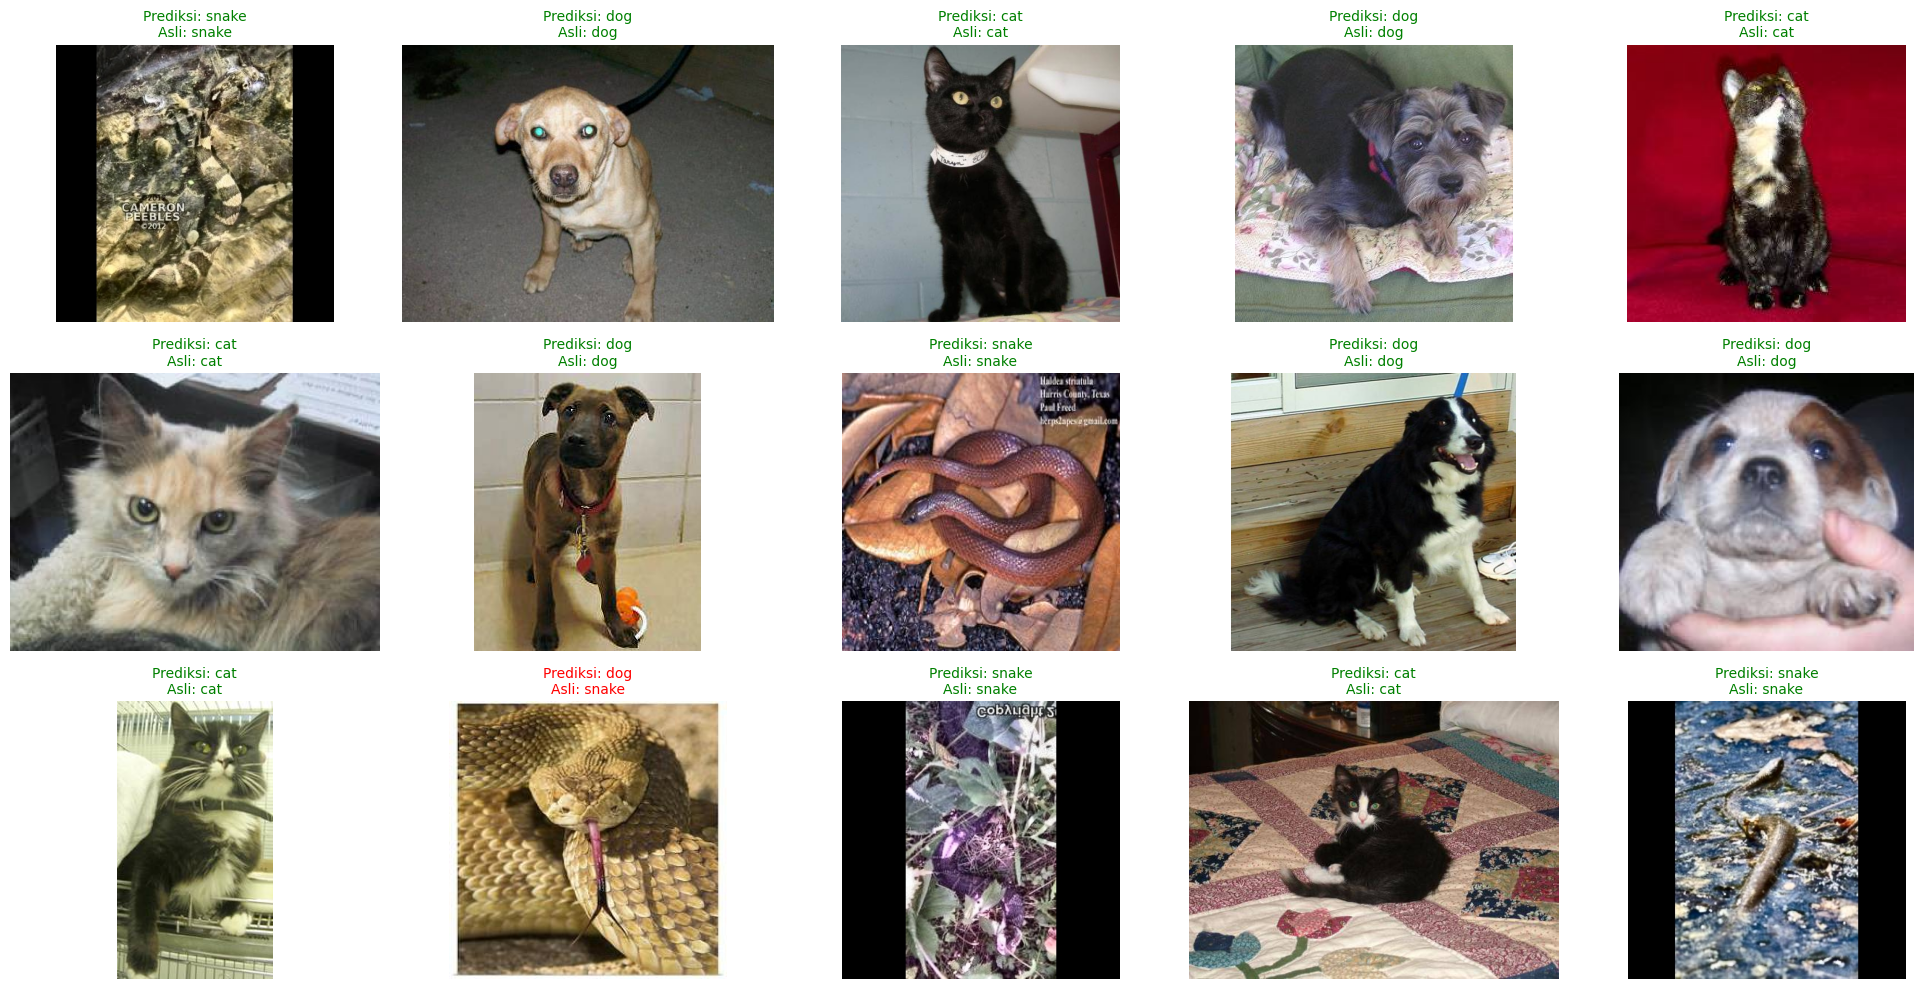

In [ ]:
# Load model
model = tf.keras.models.load_model('best_model.keras')

# Data generator
base_dir = 'data'
img_size = (150, 150)
batch_size = 32

valid_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = valid_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Mapping
class_indices = test_generator.class_indices
idx_to_label = {v: k for k, v in class_indices.items()}

# Prediksi semua gambar
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
filepaths = test_generator.filepaths

# Kelompokkan indeks berdasarkan kelas asli
class_to_indices = {}
for idx, label in enumerate(true_classes):
    class_to_indices.setdefault(label, []).append(idx)

# Ambil 5 sample dari masing-masing kelas
samples_per_class = 5
selected_indices = []
for label, indices in class_to_indices.items():
    selected = random.sample(indices, min(samples_per_class, len(indices)))
    selected_indices.extend(selected)

# Acak urutan supaya tidak berurutan per kelas
random.shuffle(selected_indices)

# Visualisasi
plt.figure(figsize=(20, 10))
for i, idx in enumerate(selected_indices):
    img_path = filepaths[idx]
    img = plt.imread(img_path)
    plt.subplot(3, 5, i+1)
    plt.imshow(img)
    plt.axis('off')

    pred_label = idx_to_label[predicted_classes[idx]]
    true_label = idx_to_label[true_classes[idx]]

    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Prediksi: {pred_label}\nAsli: {true_label}", color=color, fontsize=10)

plt.tight_layout()
plt.show()

Terakhir saya melakukan inference testing untuk evaluasi performa model dengan memuat model terbaik (`best_model.keras`) lalu melakukan prediksi pada data *test set*. Data *test* ini di-*load* menggunakan `ImageDataGenerator` dari TensorFlow, yang melakukan *rescaling* pixel gambar menjadi rentang [0, 1]. Model kemudian memprediksi kelas dari semua gambar pada *test set*, dan hasil prediksi dibandingkan dengan label aslinya. Selanjutnya, dipilih beberapa gambar per kelas (maksimal 5 gambar) secara acak untuk divisualisasikan. Pada setiap gambar yang ditampilkan, ditulis hasil prediksi model dan label sebenarnya. Judul berwarna hijau jika prediksi benar dan merah jika salah.

Dari hasil visualisasi, dapat dilihat bahwa mayoritas prediksi model sudah sesuai dengan label aslinya (terlihat dari dominasi warna hijau pada judul gambar). Namun, terdapat beberapa kesalahan prediksi, seperti kasus gambar ular yang salah diprediksi sebagai anjing. Ini menunjukkan bahwa walaupun model sudah sangat baik, masih ada ruang untuk perbaikan, khususnya dalam membedakan gambar yang mungkin memiliki karakteristik visual yang mirip antar kelas.